# 07_1.Own-Way ANOVA
- https://pingouin-stats.org/build/html/generated/pingouin.anova.html#pingouin.anova

## 1.기본 package 설정

In [ ]:
# 그래프에서 한글 폰트 인식하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
!pip install pingouin

#  *** 세션 다시 시작

In [1]:
# 1.기본
import numpy as np  # numpy 패키지 가져오기
import matplotlib.pyplot as plt # 시각화 패키지 가져오기
import seaborn as sns # 시각화

# 2.데이터 가져오기
import pandas as pd # csv -> dataframe으로 전환

# 3.통계분석 package
import pingouin as pg
from scipy import stats
import statsmodels.api as sm

In [2]:
# 기본세팅
# 테마 설정
sns.set_theme(style = "darkgrid")

# 한글 인식
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False # -인식

## 2.데이터 불러오기(github)

### 2.1 데이터 프레임으로 저장
- 원본데이터(csv)를 dataframe 형태로 가져오기(pandas)

In [3]:
# 원본데이터(csv)를 dataframe 형태로 가져오기(pandas)
owa_df = pd.read_csv('https://raw.githubusercontent.com/leecho-bigdata/statistics-python/main/07_1.OWA.csv', encoding="cp949")
owa_df.head()

,매장,만족도1,만족도2,만족도3,만족도4,만족도5
0,2,85,85,85,84,84
1,2,82,82,82,81,81
2,3,90,86,88,88,86
3,2,88,88,88,87,87
4,1,93,93,93,93,93


### 2.2 범주형 변수 처리
- 가변수 처리시 문자로 처리를 해야 변수명 구분이 쉬움

In [4]:
owa_df['매장'].replace({1:'강남', 2:'강동', 3:'강서'}, inplace=True)
owa_df['매장'] = owa_df['매장'].astype('category')

owa_df.head()

,매장,만족도1,만족도2,만족도3,만족도4,만족도5
0,강동,85,85,85,84,84
1,강동,82,82,82,81,81
2,강서,90,86,88,88,86
3,강동,88,88,88,87,87
4,강남,93,93,93,93,93


### 2.3 자료구조 살펴보기

In [5]:
owa_df.shape

(150, 6)

In [6]:
owa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   매장      150 non-null    category
 1   만족도1    150 non-null    int64   
 2   만족도2    150 non-null    int64   
 3   만족도3    150 non-null    int64   
 4   만족도4    150 non-null    int64   
 5   만족도5    150 non-null    int64   
dtypes: category(1), int64(5)
memory usage: 6.3 KB


In [7]:
owa_df.columns

Index(['매장', '만족도1', '만족도2', '만족도3', '만족도4', '만족도5'], dtype='object')

## 3.기술통계

In [8]:
# 그룹별 기술통계
owa_df.groupby('매장')["만족도1"].describe().round(3)

,count,mean,std,min,25%,50%,75%,max
매장,,,,,,,,
강남,50.0,89.56,5.610,78.0,86.0,89.0,94.00,99.0
강동,50.0,88.22,5.396,75.0,85.0,88.5,92.00,99.0
강서,50.0,88.06,4.770,78.0,85.0,88.0,90.75,98.0


In [9]:
# 분석변수가 여러개 일 때
num_feature = ['만족도1', '만족도2', '만족도3', '만족도4', '만족도5']
for num in num_feature:
    print("----", num, "----")
    results = owa_df.groupby('매장')[num].describe().round(3)
    print(results, "\n")

---- 만족도1 ----
    count   mean    std   min   25%   50%    75%   max
매장                                                    
강남   50.0  89.56  5.610  78.0  86.0  89.0  94.00  99.0
강동   50.0  88.22  5.396  75.0  85.0  88.5  92.00  99.0
강서   50.0  88.06  4.770  78.0  85.0  88.0  90.75  98.0 

---- 만족도2 ----
    count   mean    std   min   25%   50%    75%   max
매장                                                    
강남   50.0  89.56  5.610  78.0  86.0  89.0  94.00  99.0
강동   50.0  88.22  5.396  75.0  85.0  88.5  92.00  99.0
강서   50.0  84.06  4.770  74.0  81.0  84.0  86.75  94.0 

---- 만족도3 ----
    count   mean    std   min   25%   50%    75%   max
매장                                                    
강남   50.0  89.56  5.610  78.0  86.0  89.0  94.00  99.0
강동   50.0  87.90  4.958  75.0  85.0  88.5  92.00  95.0
강서   50.0  86.06  4.770  76.0  83.0  86.0  88.75  96.0 

---- 만족도4 ----
    count   mean    std   min   25%   50%    75%   max
매장                                                    

## 4.ANOVA


### 4.1 ANOVA(차이 없는 경우)

In [10]:
# 등분산일때
pg.anova(dv = '만족도1',
         between = '매장',
         data = owa_df,
         detailed = True).round(3)

,Source,SS,DF,MS,F,p-unc,np2
0,매장,67.853,2,33.927,1.221,0.298,0.016
1,Within,4083.720,147,27.780,NaN,NaN,NaN


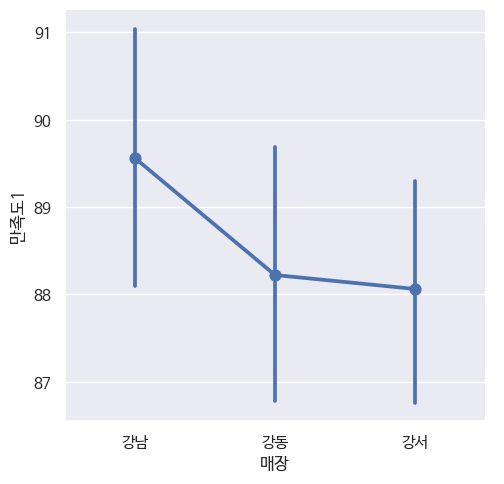

In [11]:
# 그래프
sns.catplot(x = "매장",
            y = "만족도1",
            kind = "point",
            data = owa_df)
plt.show()

### 4.2 ANOVA(차이 있을 경우)
- 만족도2: 강남=강동-강서 차이가 있음 (a,a,b)
- 만족도3: 강남-강서만 차이 있음(a, ab, b)

#### 4.2.1 ANOVA

In [12]:
# 등분산일때
pg.anova(dv = '만족도2',
         between = '매장',
         data = owa_df,
         detailed = True).round(3)

,Source,SS,DF,MS,F,p-unc,np2
0,매장,822.52,2,411.26,14.804,0.0,0.168
1,Within,4083.72,147,27.78,NaN,NaN,NaN


In [13]:
# 등분산일때
pg.anova(dv = '만족도3',
         between = '매장',
         data = owa_df,
         detailed = True).round(3)

,Source,SS,DF,MS,F,p-unc,np2
0,매장,306.52,2,153.26,5.834,0.004,0.074
1,Within,3861.64,147,26.27,NaN,NaN,NaN


#### 4.2.2 사후분석(post-hoc, Multicom)

In [14]:
# post-hoc test: LSD
pg.pairwise_tests(data = owa_df,
                   dv = '만족도2',
                   between = '매장').round(3)

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,매장,강동,강서,False,True,4.085,98.0,two-sided,0.000,241.199,0.811
1,매장,강동,강남,False,True,-1.217,98.0,two-sided,0.226,0.407,-0.242
2,매장,강서,강남,False,True,-5.281,98.0,two-sided,0.000,1.77e+04,-1.048


In [15]:
# post-hoc test: Tukey
pg.pairwise_tukey(data = owa_df,
                  dv = '만족도2',
                  between = '매장').round(3)

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,강동,강서,88.22,84.06,4.16,1.054,3.946,0.000,0.811
1,강동,강남,88.22,89.56,-1.34,1.054,-1.271,0.414,-0.242
2,강서,강남,84.06,89.56,-5.50,1.054,-5.218,0.000,-1.048


In [16]:
# post-hoc test: Tukey
pg.pairwise_tukey(data = owa_df,
                  dv = '만족도3',
                  between = '매장').round(3)

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,강동,강서,87.90,86.06,1.84,1.025,1.795,0.175,0.375
1,강동,강남,87.90,89.56,-1.66,1.025,-1.619,0.241,-0.311
2,강서,강남,86.06,89.56,-3.50,1.025,-3.414,0.002,-0.667


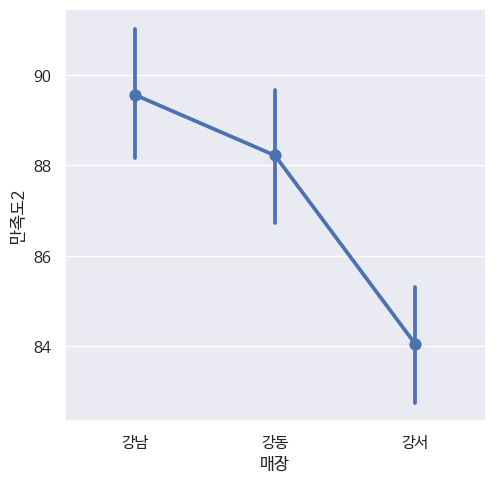

In [17]:
# 그래프
sns.catplot(x = "매장",
            y = "만족도2",
            kind = "point",
            data = owa_df)
plt.show()

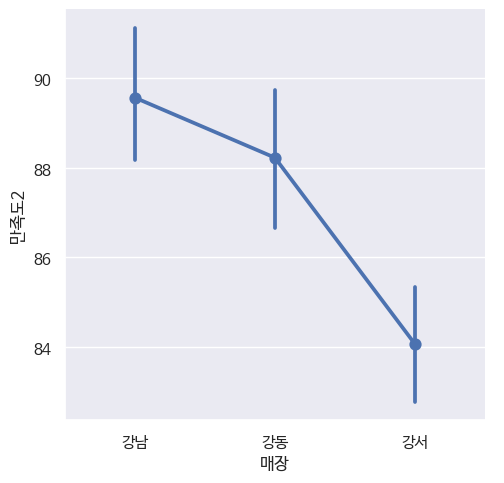

In [18]:
# 그래프
sns.catplot(x = "매장",
            y = "만족도2",
            kind = "point",
            data = owa_df)
plt.show()

## 5.등분산 검정
- 잔차의 등분산성을 검정해야 함
- pg 모형는 잔차가 없어서 statsmodels를 이용해야 함

### 5.1 등분산 검정

In [19]:
# 등분산이면 지금까지 분석한 것이 문제 없음
pg.homoscedasticity(owa_df, dv="만족도1", group="매장")

,W,pval,equal_var
levene,1.531605,0.219618,True


In [20]:
num_feature = ['만족도1', '만족도2', '만족도3', '만족도4', '만족도5']
for num in num_feature:
    print("----", num, "----")
    results = pg.homoscedasticity(owa_df, dv=num, group="매장")
    print(results, "\n")

---- 만족도1 ----
               W      pval  equal_var
levene  1.531605  0.219618       True 

---- 만족도2 ----
               W      pval  equal_var
levene  1.531605  0.219618       True 

---- 만족도3 ----
               W      pval  equal_var
levene  1.608568  0.203677       True 

---- 만족도4 ----
                W          pval  equal_var
levene  18.485413  6.898834e-08      False 

---- 만족도5 ----
                W      pval  equal_var
levene  11.235009  0.000029      False 



### 5.2 이분산일때(Welch's test)

#### 5.2.1 ANOVA(Welch's test)

In [21]:
pg.homoscedasticity(owa_df, dv="만족도4", group="매장")

,W,pval,equal_var
levene,18.485413,6.898834e-08,False


In [22]:
# Welch's test
pg.welch_anova(dv = '만족도4',
               between = '매장',
               data = owa_df).round(3)

,Source,ddof1,ddof2,F,p-unc,np2
0,매장,2,83.173,20.622,0.0,0.203


In [23]:
# 등분산일때와 비교
pg.anova(dv = '만족도4',
         between = '매장',
         data = owa_df,
         detailed = True).round(3)

,Source,SS,DF,MS,F,p-unc,np2
0,매장,735.853,2,367.927,18.678,0.0,0.203
1,Within,2895.720,147,19.699,NaN,NaN,NaN


#### 5.2.2 이분산 사후분석(post-hoc, Multicom)

In [24]:
# 이분산 post-hoc test
pg.pairwise_gameshowell(data = owa_df,
                        dv = '만족도4',
                        between = '매장').round(3)

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,강동,강서,84.22,86.06,-1.84,0.743,-2.476,69.054,0.041,-0.491
1,강동,강남,84.22,89.56,-5.34,0.853,-6.263,63.805,0.000,-1.243
2,강서,강남,86.06,89.56,-3.50,1.041,-3.361,95.527,0.003,-0.667


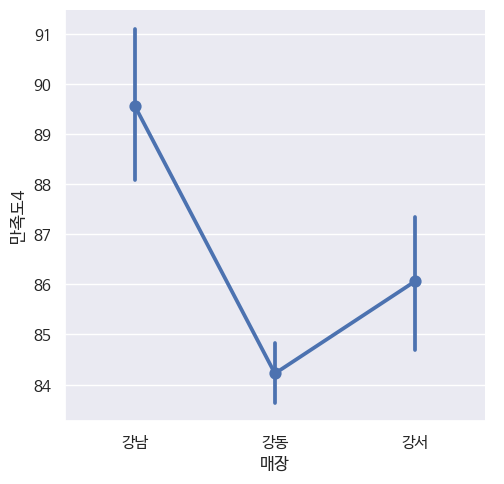

In [25]:
# 그래프
sns.catplot(x = "매장",
            y = "만족도4",
            kind = "point",
            data = owa_df)
plt.show()

## 6.정규성 검정
- 잔차의 정규성을 검정해야 함
- pg 모형는 잔차가 없어서 statsmodels를 이용해야 함

### 6.1 정규분포 검정



In [26]:
# 매장별 정규성을 검정하면 강동은 정규성이 아닌 것으로 나타남
# 잔차의 정규성을 검정해야 함
pg.normality(owa_df, dv='만족도4', group='매장')

,W,pval,normal
매장,,,
강동,0.891831,0.000261,False
강서,0.974630,0.353244,True
강남,0.969113,0.212952,True


In [27]:
# 잔차의 정규성을 검정한 결과 잔차는 정규분포로 나타남
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('만족도4 ~ C(매장)', data = owa_df)
result = model.fit()
pg.normality(result.resid).round(3)

,W,pval,normal
0,0.989,0.268,True


### 6.2 비모수일때(Kruskal Wallis)

#### 6.2.1 Kruskal Wallis

In [28]:
pg.normality(owa_df, dv='만족도5', group='매장')

,W,pval,normal
매장,,,
강동,0.838372,0.000008,False
강서,0.957795,0.071865,True
강남,0.889787,0.000225,False


In [29]:
# 잔차의 정규성
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('만족도5 ~ C(매장)', data = owa_df).fit()
pg.normality(model.resid).round(3)

,W,pval,normal
0,0.912,0.0,False


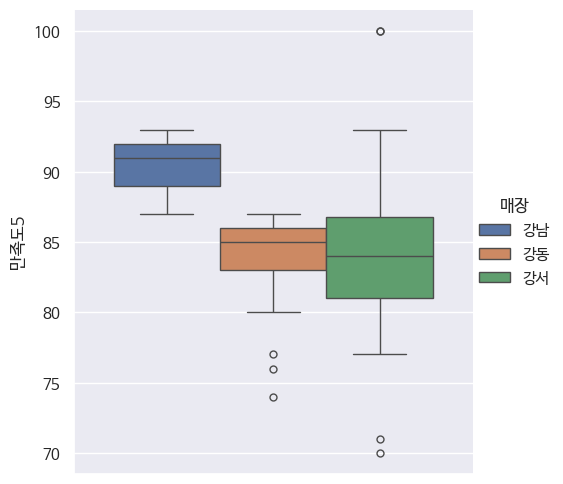

In [30]:
# 이상치 검정 그래프
sns.catplot(data = owa_df,
            y = owa_df["만족도5"],
            hue = owa_df["매장"],
            kind = "box")
plt.show()

In [31]:
# Kruskal Wallis
pg.kruskal(dv = '만족도5',
           between = '매장',
           data = owa_df).round(3)

,Source,ddof1,H,p-unc
Kruskal,매장,2,73.725,0.0


In [32]:
# 모수통계(t-test)와 비교
pg.anova(dv = '만족도5',
         between = '매장',
         data = owa_df,
         detailed = True).round(3)

,Source,SS,DF,MS,F,p-unc,np2
0,매장,1228.653,2,614.327,39.801,0.0,0.351
1,Within,2268.920,147,15.435,NaN,NaN,NaN


#### 6.2.2 비모수 사후분석(post-hoc, Multicom)

In [33]:
# 비모수 post-hoc test: LSD
pg.pairwise_tests(data = owa_df,
                   dv = '만족도5',
                   between = '매장',
                   parametric = False).round(3)

,Contrast,A,B,Paired,Parametric,U-val,alternative,p-unc,hedges
0,매장,강동,강서,False,False,1300.0,two-sided,0.731,-0.030
1,매장,강동,강남,False,False,31.5,two-sided,0.000,-2.410
2,매장,강서,강남,False,False,325.0,two-sided,0.000,-1.366


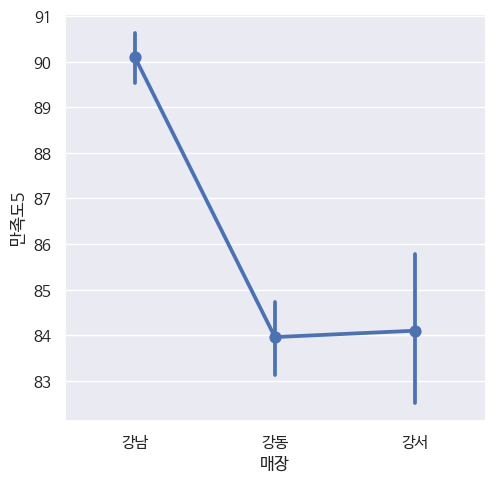

In [34]:
# 그래프
sns.catplot(x = "매장",
            y = "만족도5",
            kind = "point",
            data = owa_df)
plt.show()

## 7.검증결과 그래프

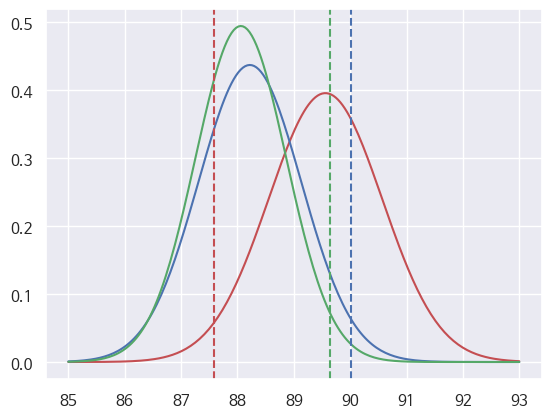

In [35]:
from scipy.stats import norm # 정규분포

x_data = np.linspace(85, 93, 200)

x1 = 89.560
x2 = 88.220
x3 = 88.060

se1 = 5.610/np.sqrt(31) # 표준오차(표준편차/sqrt(n)))
se2 = 5.396/np.sqrt(35) # 표준오차(표준편차/sqrt(n)))
se3 = 4.770/np.sqrt(35) # 표준오차(표준편차/sqrt(n)))

plt.plot(x_data, norm.pdf(x_data, loc = x1, scale = se1), 'r-')
plt.plot(x_data, norm.pdf(x_data, loc = x2, scale = se2), 'b-')
plt.plot(x_data, norm.pdf(x_data, loc = x3, scale = se3), 'g-')

plt.axvline(x = x1 - 1.96 * se1, color='r', linestyle='--')
plt.axvline(x = x2 + 1.96 * se2, color='b', linestyle='--')
plt.axvline(x = x3 + 1.96 * se3, color='g', linestyle='--')
plt.show()

## 8.statsmodels 이용

In [36]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('만족도1 ~ 매장', data = owa_df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table.round(3)

,sum_sq,df,F,PR(>F)
매장,67.853,2.0,1.221,0.298
Residual,4083.720,147.0,NaN,NaN


In [37]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

posthoc = pairwise_tukeyhsd(owa_df["만족도1"],
                            owa_df["매장"])
print(posthoc)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    강남     강동    -1.34 0.4137 -3.8359 1.1559  False
    강남     강서     -1.5 0.3318 -3.9959 0.9959  False
    강동     강서    -0.16 0.9874 -2.6559 2.3359  False
---------------------------------------------------


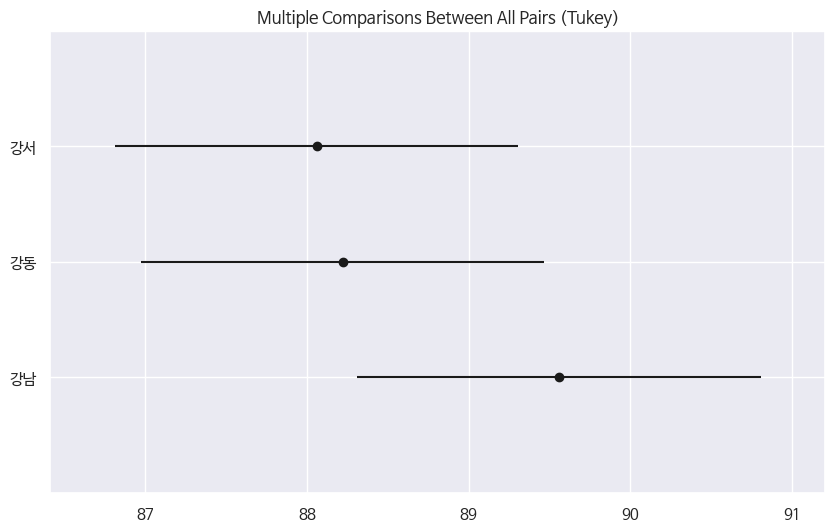

In [38]:
fig = posthoc.plot_simultaneous()

In [39]:
# welch test
# welch_correction = True
x1 = owa_df['만족도4'][owa_df['매장'] == '강남']
x2 = owa_df['만족도4'][owa_df['매장'] == '강동']
x3 = owa_df['만족도4'][owa_df['매장'] == '강서']
df =[x1,x2,x3]

from statsmodels.stats.oneway import anova_oneway
s, p = anova_oneway(data = df,
                    groups = None,
                    use_var = 'unequal',
                    welch_correction = True)
s, p

(20.621760583893327, 5.329746058936572e-08)